In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [4]:
import pandas as pd

rawDataset = pd.read_excel('vehicle_emission.xls', index_col=0)
rawDataset

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17


In [6]:
dataset = rawDataset.copy()
dataset

,Make,Yr,Fuel,Vehicle,Use,CO,CO2,O2,HC,Age
1,Honda,2006,Petrol,Car,Commercial,0,13.5,1.55,0,8
2,Honda,2007,Petrol,Jeep,Commercial,0,14.7,0.08,10,7
3,Toyota,2011,Petrol,Car,Commercial,0,14.6,0.72,1,3
4,Toyota,1998,Petrol,Car,Official,0,10.2,3.15,1,16
5,Toyota,2002,Petrol,Car,Official,0,14.5,0.60,1,12
6,Toyota,2002,Petrol,Jeep,Official,0,12.9,1.52,4,12
7,Honda,1993,Petrol,Car,Private,0,12.5,2.80,34,21
8,Honda,1993,Petrol,Car,Private,0,5.3,5.30,697,21
9,Volswagen,1994,Petrol,Car,Private,0,12.5,12.50,4,20
10,Nissan,1997,Petrol,Jeep,Private,0,13.6,5.30,4,17


In [7]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset

,Yr,CO,CO2,O2,HC,Age,Honda,Nissan,Toyota,Volswagen,Petrol,Car,Jeep,Commercial,Official,Private
1,2006,0,13.5,1.55,0,8,1,0,0,0,1,1,0,1,0,0
2,2007,0,14.7,0.08,10,7,1,0,0,0,1,0,1,1,0,0
3,2011,0,14.6,0.72,1,3,0,0,1,0,1,1,0,1,0,0
4,1998,0,10.2,3.15,1,16,0,0,1,0,1,1,0,0,1,0
5,2002,0,14.5,0.60,1,12,0,0,1,0,1,1,0,0,1,0
6,2002,0,12.9,1.52,4,12,0,0,1,0,1,0,1,0,1,0
7,1993,0,12.5,2.80,34,21,1,0,0,0,1,1,0,0,0,1
8,1993,0,5.3,5.30,697,21,1,0,0,0,1,1,0,0,0,1
9,1994,0,12.5,12.50,4,20,0,0,0,1,1,1,0,0,0,1
10,1997,0,13.6,5.30,4,17,0,1,0,0,1,0,1,0,0,1


In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [9]:
train_dataset

,Yr,CO,CO2,O2,HC,Age,Honda,Nissan,Toyota,Volswagen,Petrol,Car,Jeep,Commercial,Official,Private
3,2011,0,14.6,0.72,1,3,0,0,1,0,1,1,0,1,0,0
9,1994,0,12.5,12.50,4,20,0,0,0,1,1,1,0,0,0,1
5,2002,0,14.5,0.60,1,12,0,0,1,0,1,1,0,0,1,0
10,1997,0,13.6,5.30,4,17,0,1,0,0,1,0,1,0,0,1
2,2007,0,14.7,0.08,10,7,1,0,0,0,1,0,1,1,0,0
7,1993,0,12.5,2.80,34,21,1,0,0,0,1,1,0,0,0,1
8,1993,0,5.3,5.30,697,21,1,0,0,0,1,1,0,0,0,1
4,1998,0,10.2,3.15,1,16,0,0,1,0,1,1,0,0,1,0


In [10]:
test_dataset

,Yr,CO,CO2,O2,HC,Age,Honda,Nissan,Toyota,Volswagen,Petrol,Car,Jeep,Commercial,Official,Private
1,2006,0,13.5,1.55,0,8,1,0,0,0,1,1,0,1,0,0
6,2002,0,12.9,1.52,4,12,0,0,1,0,1,0,1,0,1,0


/home/goke/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


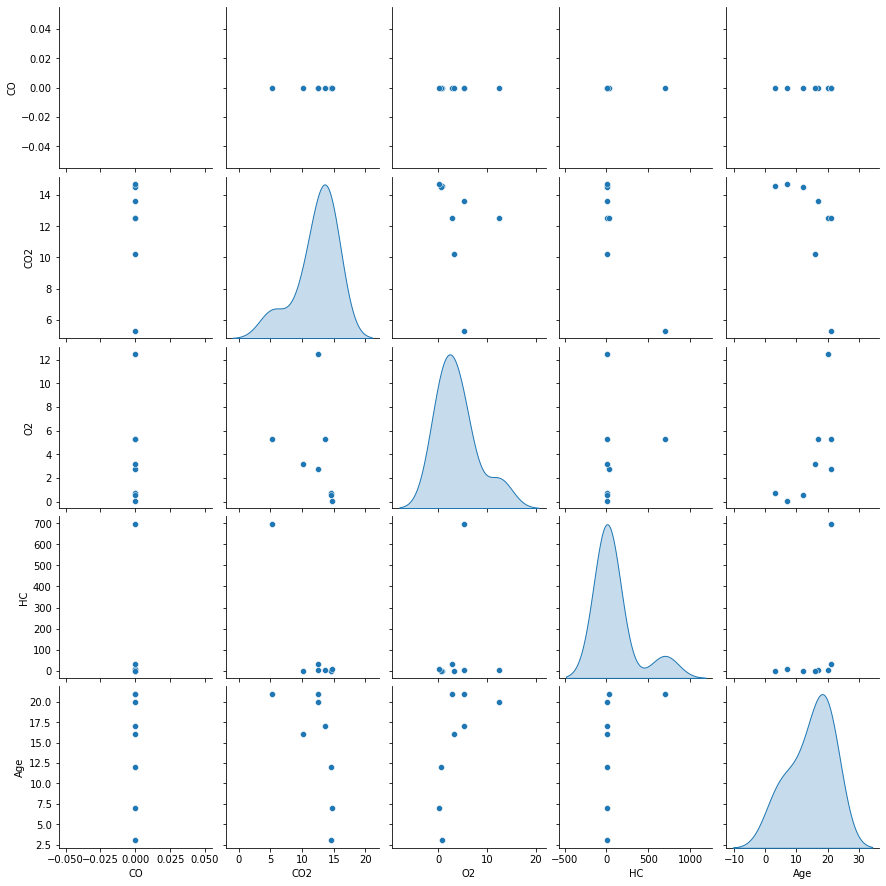

In [13]:
sns.pairplot(train_dataset[['CO', 'CO2', 'O2', 'HC', 'Age']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Yr,8.0,1999.37500,6.738747,1993.00,1993.750,1997.500,2003.250,2011.0
CO,8.0,0.00000,0.000000,0.00,0.000,0.000,0.000,0.0
CO2,8.0,12.23750,3.185654,5.30,11.925,13.050,14.525,14.7
O2,8.0,3.80625,4.056335,0.08,0.690,2.975,5.300,12.5
HC,8.0,94.00000,243.900448,1.00,1.000,4.000,16.000,697.0
Age,8.0,14.62500,6.738747,3.00,10.750,16.500,20.250,21.0
Honda,8.0,0.37500,0.517549,0.00,0.000,0.000,1.000,1.0
Nissan,8.0,0.12500,0.353553,0.00,0.000,0.000,0.000,1.0
Toyota,8.0,0.37500,0.517549,0.00,0.000,0.000,1.000,1.0
Volswagen,8.0,0.12500,0.353553,0.00,0.000,0.000,0.000,1.0


In [26]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features[['CO','CO2','O2','HC']]
test_labels = test_features[['CO','CO2','O2','HC']]

train_features = train_features.drop(['CO','CO2','O2','HC','Yr'], axis=1)
test_features = test_features.drop(['CO','CO2','O2','HC','Yr'], axis=1)


In [27]:
train_features

,Age,Honda,Nissan,Toyota,Volswagen,Petrol,Car,Jeep,Commercial,Official,Private
3,3,0,0,1,0,1,1,0,1,0,0
9,20,0,0,0,1,1,1,0,0,0,1
5,12,0,0,1,0,1,1,0,0,1,0
10,17,0,1,0,0,1,0,1,0,0,1
2,7,1,0,0,0,1,0,1,1,0,0
7,21,1,0,0,0,1,1,0,0,0,1
8,21,1,0,0,0,1,1,0,0,0,1
4,16,0,0,1,0,1,1,0,0,1,0


In [28]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Yr,1999.37500,6.738747
CO,0.00000,0.000000
CO2,12.23750,3.185654
O2,3.80625,4.056335
HC,94.00000,243.900448
Age,14.62500,6.738747
Honda,0.37500,0.517549
Nissan,0.12500,0.353553
Toyota,0.37500,0.517549
Volswagen,0.12500,0.353553


In [29]:
normalizer = preprocessing.Normalization()

In [31]:
normalizer.adapt(np.array(train_features))

In [32]:
print(normalizer.mean.numpy())

[14.625  0.375  0.125  0.375  0.125  1.     0.75   0.25   0.25   0.25
  0.5  ]
